In [ ]:
# Librerías
import numpy as np
import time
import matplotlib.pyplot as plt

# Gradiente Conjugado

In [ ]:
# Descenso Gradiente
def conjugate_gradient (params = [], show_logs = False) :
  # Cargo parámetros
  x_k        = params['x_0']
  x_k_next   = None
    
  f          = params['f']
  f_grad     = params['f_grad']
  max_iter   = params['max_iter']
  tau_x      = params['tau_x']
  tau_f      = params['tau_f']
  tau_f_grad = params['tau_grad']

  # Parámetros para evaluación de f
  sub_params = params['f_params']
  Q          = sub_params['Q']
        
  # Guardo Parámetros
  f_hist = []
  f_hist.append(f(x_k, params = sub_params))

  g_k      = f_grad(x_k, params = sub_params)
  g_k_next = None
  d_k      =  - g_k

  g_hist = []
  g_hist.append(np.linalg.norm(f_grad(x_k, params = sub_params)))

  # Comienza iteraciones
  k = 0 
  while True:
    # Obtengo Q d_k
    q_k     = Q.dot(d_k)
    alpha_k = - (g_k.dot(d_k)) / (d_k.T.dot(q_k))
    
    # Calculo siguiente valor x_k+1
    x_k_next = x_k + alpha_k * d_k
    # Calculo gradiente para siguiente iteración
    g_k      = f_grad(x_k_next, params = sub_params)
      
    # Guardo Parámetros
    f_hist.append(f(x_k_next,  sub_params))
    g_hist.append(np.linalg.norm(g_k))

    # Calculo siguiente dirección de descenso
    beta_k = (g_k.T.dot(q_k)) / (d_k.T.dot(q_k))

    d_k    = -g_k + beta_k * d_k

    # Criterios de paro -------------------------------------------------------
    if k > max_iter :
      if show_logs :
        print('Iteraciones: ', k, ' , valor: ', x_k_next)
      break 
    if np.linalg.norm(x_k_next - x_k) / max(np.linalg.norm(x_k), 1.0) < tau_x :
      if show_logs :
        print('Iteraciones: ', k, ' , valor: ', x_k_next)
      break      
    if np.linalg.norm(g_hist[-1]) < tau_f_grad :
      if show_logs :
        print('Iteraciones: ', k, ' , valor: ', x_k_next)
      break
    # -------------------------------------------------------------------------
    # Actualización   
    x_k = x_k_next       
    k   = k + 1
  return  np.array(f_hist), np.array(g_hist), x_k_next

# Barzilai-Borwein

In [ ]:
# Descenso Gradiente
def barzilai_borwein (params = [], show_logs = False) :
  # Cargo parámetros
  x_k_prev   = None
  x_k        = params['x_0']
  f          = params['f']

  f_grad     = params['f_grad']
  g_k_prev   = None
  max_iter   = params['max_iter']
  tau_x      = params['tau_x']
  tau_f      = params['tau_f']
  tau_f_grad = params['tau_grad']

  # Parámetros para evaluación de f
  sub_params = params['f_params']
        
  # Guardo Parámetros
  f_hist = []

  g_k    = f_grad(x_k, params = sub_params)
  g_hist = []

  # Comienza iteraciones
  k       = 0 
  alpha_k = params['alpha']

  while True:
    # Entrar solo si no corresponde a paso exacto
    if k != 0 :  
      s_k1     = x_k - x_k_prev
      y_k1     = g_k - g_k_prev
      alpha_k  = s_k1.T.dot(y_k1) / y_k1.T.dot(y_k1)

    # Calculo siguiente valor x_k+1
    x_k_prev = x_k
    x_k      = x_k_prev - alpha_k * g_k
    
    # Calculo gradiente para siguiente iteración
    g_k_prev = g_k
    g_k      = f_grad(x_k, params = sub_params)
      
    # Guardo Parámetros
    f_hist.append(f(x_k,  sub_params))
    g_hist.append(np.linalg.norm(g_k))

    # Criterios de paro -------------------------------------------------------
    if k > max_iter :
      if show_logs :
        print('Iteraciones: ', k, ' , valor: ', x_k)
      break 
    if np.linalg.norm(x_k - x_k_prev) / max(np.linalg.norm(x_k_prev), 1.0) < tau_x :
      if show_logs :
        print('Iteraciones: ', k, ' , valor: ', x_k)
      break      
    if np.linalg.norm(g_hist[-1]) < tau_f_grad :
      if show_logs :
        print('Iteraciones: ', k, ' , valor: ', x_k)
      break
    # -------------------------------------------------------------------------
    # Actualización   
    k   = k + 1

  return np.array(f_hist), np.array(g_hist), x_k

# Descenso Gradiente con paso exacto

In [ ]:
def steepest_descent (params = [], show_logs = False) :
    # Cargo parámetros
    x_k        = params['x_0']
    x_k_next   = None
    
    f          = params['f']
    f_grad     = params['f_grad']
    max_iter   = params['max_iter']
    tau_x      = params['tau_x']
    tau_f      = params['tau_f']
    tau_f_grad = params['tau_grad']
    
    sub_params = params['f_params']
    # Guardo Parámetros
    f_hist = []
    f_hist.append(f(x_k, sub_params))

    g_hist = []
    g_hist.append(np.linalg.norm(f_grad(x_k, sub_params)))  
    
    # Comienza descenso
    k = 0 
    while True:
        # Calculo gradiente
        g_k      = f_grad(x_k, sub_params) 
        d_k      = - g_k
        # Cálculo tamaño de paso
        alpha_k  = ( g_k.T.dot(g_k) ) / ( g_k.T.dot(Q).dot(g_k) )   

        x_k_next = x_k + alpha_k * d_k   

        f_hist.append(f(x_k_next, sub_params))
        g_hist.append(np.linalg.norm(f_grad(x_k_next, params = sub_params)))
        # Criterios de paro
        if k > max_iter :
            break       
        g_k_norm = np.linalg.norm(f_grad(x_k_next, sub_params))
        if g_k_norm < tau_f_grad :
          if show_logs :
            print('Iteraciones: ', k, ' , valor: ', x_k_next)
          break
        if np.abs(f_hist[-1] - f_hist[-2]) / max(np.abs(f_hist[-2]), 1.0) < tau_f :
          if show_logs :
            print('Iteraciones: ', k, ' , valor: ', x_k_next)
          break 
        if np.linalg.norm(x_k_next - x_k) / max(np.linalg.norm(x_k), 1.0) < tau_x :
          if show_logs :
            print('Iteraciones: ', k, ' , valor: ', x_k_next)
          break 
        # Guardo valor anterior   
        x_k = x_k_next       
        k   = k + 1        

    return np.array(f_hist), np.array(g_hist), x_k_next

# Función a optimizar

In [ ]:
def generate_Q_b (n = 10000, m = 3, ncond = 2) :
  # Creo matrix diagonal
  d = np.zeros(n, dtype = np.float32)
  for i in range(n) :
    d[i] = np.exp( i / (n - 1) * ncond )
  D = np.diag (d, k = 0)
  
  # Genero matriz P
  P = np.identity(n, dtype = np.float32)
  for j in range(m) :
    u_j = np.random.uniform(-1, 1, size = (n, 1))
    H_j = np.identity(n, dtype = np.float32) - 2.0 / u_j.T.dot(u_j)[0][0] *  u_j.dot(u_j.T)
    P   = P * H_j

  # Obtengo Q
  Q = P * D * P.T

  # Obtengo b
  b = Q.dot( np.random.uniform(-1, 1, size = n) )

  return Q, b

In [ ]:
def f (x, params = {}) :
  Q = params['Q']
  b = params['b']

  f_ = 0.5 * x.T.dot(Q).dot(x) - b.T.dot(x)

  return f_

def f_grad (x, params = {}) :
  Q = params['Q']
  b = params['b']

  grad = Q.dot(x) - b  

  return grad

In [ ]:
def get_graf(f_hist, g_hist) :    
  plt.plot(range(f_hist.shape[0]), f_hist) 
  # naming the x axis 
  plt.xlabel('k') 
  # naming the y axis 
  plt.ylabel('f_k') 

  # giving a title to my graph 
  plt.title('Iteration vs Fuction Value') 

  # function to show the plot 
  plt.show() 

  plt.plot(range(g_hist.shape[0]), g_hist) 
  # naming the x axis 
  plt.xlabel('k') 
  # naming the y axis 
  plt.ylabel('g_k') 

  # giving a title to my graph 
  plt.title('Iteration vs Gradient Norm') 

  # function to show the plot 
  plt.show() 

# Expermentación

In [ ]:
n    = 10000
m     = 3
x     = np.random.uniform(-1, 1, size = n)

## ncond = 2

### Gradiente Conjugado

In [ ]:
ncond = 2
Q, b  = generate_Q_b(n, m, ncond)

params = {'x_0'      : x,
          'f'        : f, 
          'f_grad'   : f_grad,
          'max_iter' : 500, 
          'tau_x'    : 1e-8,
          'tau_f'    : 1e-8,
          'tau_grad' : 1e-8,
          'f_params' : {'Q'    : Q,
                        'b'    : b,
                       }
          }


f_hist, g_hist, x_k_next = conjugate_gradient(params, show_logs = True)

Iteraciones:  25  , valor:  [ 0.20908945  0.56406202 -0.47595882 ...  0.90026231 -0.06561148
 -0.75255651]


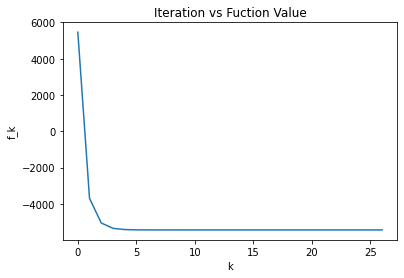

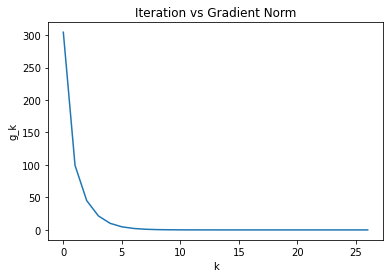

In [ ]:
get_graf(f_hist, g_hist)

### barzilai Borwein

In [ ]:
params = {'x_0'      : x,
          'alpha'    : 0.9,
          'f'        : f, 
          'f_grad'   : f_grad,
          'max_iter' : 500, 
          'tau_x'    : 1e-8,
          'tau_f'    : 1e-8,
          'tau_grad' : 1e-8,
          'f_params' : {'Q'    : Q,
                        'b'    : b,
                       }
          }

f_hist, g_hist, x_k_next = barzilai_borwein(params, show_logs = True)

Iteraciones:  28  , valor:  [ 0.20908945  0.56406202 -0.47595882 ...  0.90026231 -0.06561148
 -0.75255652]


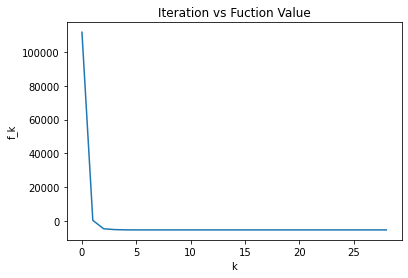

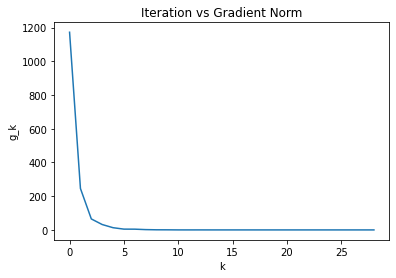

In [ ]:
get_graf(f_hist, g_hist)

### Steepest Descent

In [ ]:
params = {'x_0'      : x,
          'alpha'    : 0.5,
          'f'        : f, 
          'f_grad'   : f_grad,
          'max_iter' : 100, 
          'tau_x'    : 1e-8,
          'tau_f'    : 1e-8,
          'tau_grad' : 1e-8,
          'f_params' : {'Q' : Q,
                        'b' : b,
                       }
          }

f_hist, g_hist, x_k_next = steepest_descent(params, show_logs = True)

Iteraciones:  26  , valor:  [ 0.20848033  0.5643285  -0.4752523  ...  0.90034242 -0.0655883
 -0.75281071]


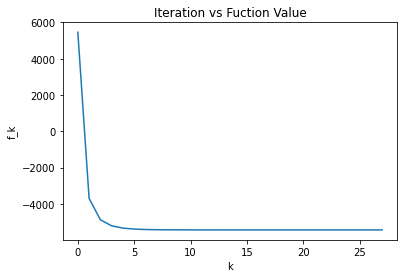

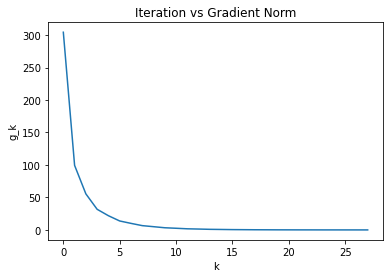

In [ ]:
get_graf(f_hist, g_hist)

## ncond = 4

### Gradiente Conjugado

In [ ]:
ncond = 4
Q, b  = generate_Q_b(n, m, ncond)

params = {'x_0'      : x,
          'f'        : f, 
          'f_grad'   : f_grad,
          'max_iter' : 500, 
          'tau_x'    : 1e-8,
          'tau_f'    : 1e-8,
          'tau_grad' : 1e-8,
          'f_params' : {'Q'    : Q,
                        'b'    : b,
                       }
          }


f_hist, g_hist, x_k_next = conjugate_gradient(params , show_logs = True)

Iteraciones:  66  , valor:  [-0.7096365   0.7334162  -0.40090622 ...  0.31043701 -0.90268662
  0.03907372]


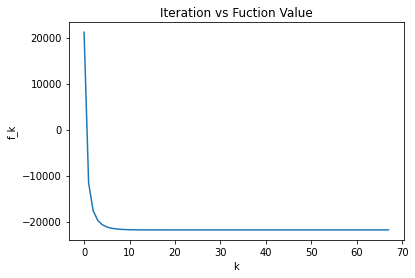

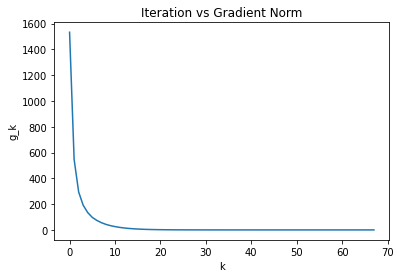

In [ ]:
get_graf(f_hist, g_hist)

### barzilai Borwein

In [ ]:
params = {'x_0'      : x,
          'alpha'    : 0.9,
          'f'        : f, 
          'f_grad'   : f_grad,
          'max_iter' : 500, 
          'tau_x'    : 1e-8,
          'tau_f'    : 1e-8,
          'tau_grad' : 1e-8,
          'f_params' : {'Q'    : Q,
                        'b'    : b,
                       }
          }

f_hist, g_hist, x_k_next = barzilai_borwein(params, show_logs = True)

Iteraciones:  75  , valor:  [-0.70963645  0.73341643 -0.40090525 ...  0.31043705 -0.90268655
  0.03907375]


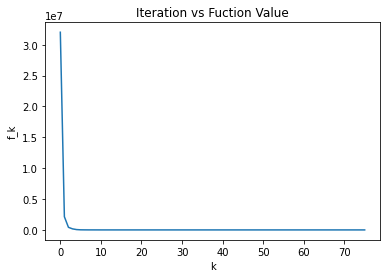

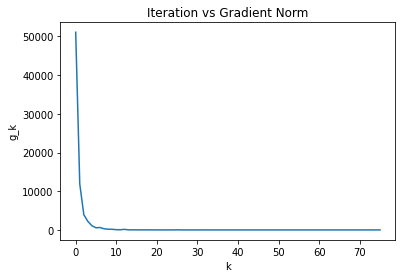

In [ ]:
get_graf(f_hist, g_hist)

### Steepest Descent

In [ ]:
params = {'x_0'      : x,
          'alpha'    : 0.5,
          'f'        : f, 
          'f_grad'   : f_grad,
          'max_iter' : 100, 
          'tau_x'    : 1e-8,
          'tau_f'    : 1e-8,
          'tau_grad' : 1e-8,
          'f_params' : {'Q' : Q,
                        'b' : b,
                       }
          }

f_hist, g_hist, x_k_next = steepest_descent(params, show_logs = True)

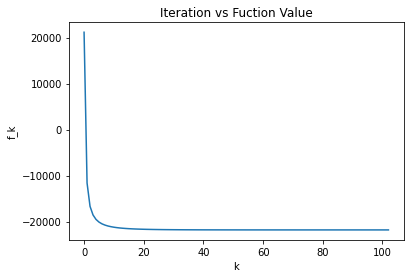

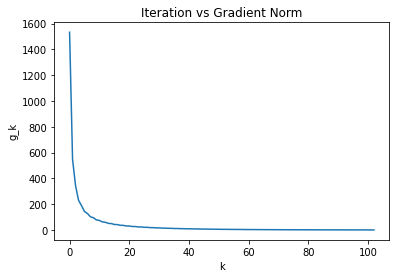

In [ ]:
get_graf(f_hist, g_hist)

## ncond = 6

In [ ]:
ncond = 6

### Gradiente Conjugado

In [ ]:
Q, b  = generate_Q_b(n, m, ncond)

params = {'x_0'      : x,
          'f'        : f, 
          'f_grad'   : f_grad,
          'max_iter' : 500, 
          'tau_x'    : 1e-8,
          'tau_f'    : 1e-8,
          'tau_grad' : 1e-8,
          'f_params' : {'Q'    : Q,
                        'b'    : b,
                       }
          }


f_hist, g_hist, x_k_next = conjugate_gradient(params, show_logs = True)

Iteraciones:  171  , valor:  [-0.54022549  0.4660268  -0.4643517  ... -0.74238927 -0.41631391
  0.12197597]


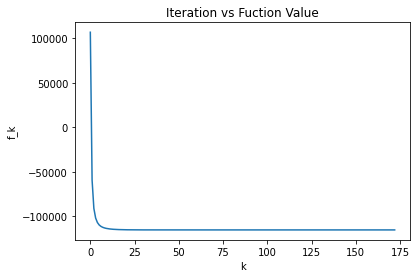

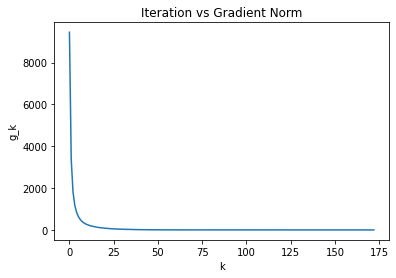

In [ ]:
get_graf(f_hist, g_hist)

### barzilai Borwein

In [ ]:
params = {'x_0'      : x,
          'alpha'    : 0.9,
          'f'        : f, 
          'f_grad'   : f_grad,
          'max_iter' : 500, 
          'tau_x'    : 1e-8,
          'tau_f'    : 1e-8,
          'tau_grad' : 1e-8,
          'f_params' : {'Q'    : Q,
                        'b'    : b,
                       }
          }

f_hist, g_hist, x_k_next = barzilai_borwein(params show_logs = True)

SyntaxError: ignored

In [ ]:
get_graf(f_hist, g_hist)

### Steepest Descent

In [ ]:
params = {'x_0'      : x,
          'alpha'    : 0.5,
          'f'        : f, 
          'f_grad'   : f_grad,
          'max_iter' : 100, 
          'tau_x'    : 1e-8,
          'tau_f'    : 1e-8,
          'tau_grad' : 1e-8,
          'f_params' : {'Q' : Q,
                        'b' : b,
                       }
          }

f_hist, g_hist, x_k_next = steepest_descent(params, show_logs = True)

In [ ]:
get_graf(f_hist, g_hist)

## Estadísticas

In [ ]:
ncond         = {2,4,6}
iters         = 30

In [ ]:
for ncond_ in ncond :
  time_gc       = []
  iterations_gc = []

  time_bb       = []
  iterations_bb = []

  time_sd       = []
  iterations_sd = []
  for i in range(iters) :
    print('Corrida :', i+1)
    Q, b  = generate_Q_b(n, m, ncond_)
    x     = np.random.uniform(-1, 1, size = n)

    params = {'x_0'      : x,
              'f'        : f, 
              'alpha'    :0.9,
              'f_grad'   : f_grad,
              'max_iter' : 500, 
              'tau_x'    : 1e-8,
              'tau_f'    : 1e-8,
              'tau_grad' : 1e-8,
              'f_params' : {'Q' : Q,
                            'b' : b,
                           }
             }
    # Gradiente Conjugado
    star                     = time.time()
    f_hist, g_hist, x_k_next = conjugate_gradient(params)
    # print('Gradiente Conjugado x* :', x)
    ex_time                  = time.time() - star  

    time_gc.append(ex_time)
    iterations_gc.append(f_hist.shape[0])

    # Barzilai Borwein
    star                     = time.time()
    f_hist, g_hist, x_k_next = barzilai_borwein(params)
    # print('Barzilai Borwein x* :', x)
    ex_time                  = time.time() - star  

    time_bb.append(ex_time)
    iterations_bb.append(f_hist.shape[0])

    # Descenso Gradiente con Paso Exacto
    star                     = time.time()
    f_hist, g_hist, x_k_next = steepest_descent(params)
    ex_time                  = time.time() - star  
    # print('Paso Exacto x* :', x)
    time_sd.append(ex_time)
    iterations_sd.append(f_hist.shape[0])
  print('ncond : ', ncond_)
  print('-' * 30)
  print('Gradiente Conjugado :')
  print('Tiempo promedio: ', np.mean(time_gc), ' Promedio de iteraciones : ', np.mean(iterations_gc))
  print('Barzilai Borwein    :')
  print('Tiempo promedio: ', np.mean(time_bb), ' Promedio de iteraciones : ', np.mean(iterations_bb))
  print('Paso Exacto         :')
  print('Tiempo promedio: ', np.mean(time_sd), ' Promedio de iteraciones : ', np.mean(iterations_sd))

Corrida : 1
Corrida : 2
Corrida : 3
Corrida : 4
Corrida : 5
Corrida : 6
Corrida : 7
Corrida : 8
Corrida : 9
Corrida : 10
Corrida : 11
Corrida : 12
Corrida : 13
Corrida : 14
Corrida : 15
Corrida : 16
Corrida : 17
Corrida : 18
Corrida : 19
Corrida : 20
Corrida : 21
Corrida : 22
Corrida : 23
Corrida : 24
Corrida : 25
Corrida : 26
Corrida : 27
Corrida : 28
Corrida : 29
Corrida : 30
ncond :  2
------------------------------
Gradiente Conjugado :
Tiempo promedio:  5.055690789222718  Promedio de iteraciones :  27.0
Barzilai Borwein    :
Tiempo promedio:  3.7065589825312295  Promedio de iteraciones :  29.066666666666666
Paso Exacto         :
Tiempo promedio:  8.546639323234558  Promedio de iteraciones :  28.0
Corrida : 1
Corrida : 2
Corrida : 3
Corrida : 4
Corrida : 5
Corrida : 6
Corrida : 7
Corrida : 8
Corrida : 9
Corrida : 10
Corrida : 11
Corrida : 12
Corrida : 13
Corrida : 14
Corrida : 15
Corrida : 16
Corrida : 17
Corrida : 18
Corrida : 19
Corrida : 20
Corrida : 21
Corrida : 22
Corrida : 23